<a href="https://colab.research.google.com/github/CarlosCR07/Mineria-de-Datos/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **PROYECTO FINAL - MINERÍA DE DATOS**
# Aplicación de Minería de Datos para la Generación de Promociones Oportunas en la Venta de Autos de Segunda Mano
***Carlos Castelan Ramos***

Archivo inicial de carga disponible en:
*https://drive.google.com/file/d/1AxmYgmkTl5cMWkw3XINJmyyP05qUn8Re/view?usp=drive_link*



# Comprensión y limpieza de los datos

In [15]:
import pandas as pd

# Leer el archivo CSV
data0 = pd.read_csv("coches-de-segunda-mano-sample.csv")
data0.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [16]:
# Eliminar las columnas "company","url", "publish_date" y "insert_date"
columns_to_drop = ["company","url", "publish_date", "insert_date"]
data0 = data0.drop(columns=columns_to_drop, axis=1)

# Guardar la tabla resultante en un nuevo archivo CSV llamado "ventasAutos.csv"
data0.to_csv("ventasAutos.csv", index=False)

print("Columnas eliminadas y archivo guardado con éxito.")

data1 = pd.read_csv("ventasAutos.csv")
data1.head()


Columnas eliminadas y archivo guardado con éxito.


,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,country
0,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain


# **Actividades de Minería de datos**



---


# Agrupación por marca

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


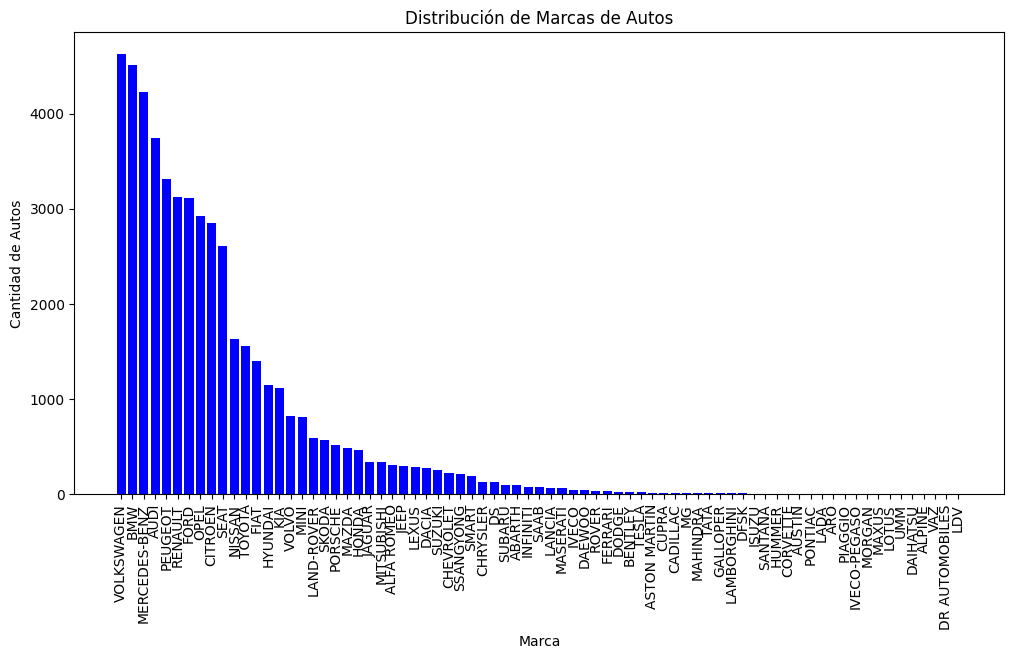

In [29]:
df = pd.read_csv("ventasAutos.csv")
# Realizar un recuento de las marcas y colores de los autos
marca_counts = df['make'].value_counts()
color_counts = df['color'].value_counts()

# Visualización de las marcas de autos
plt.figure(figsize=(12, 6))
plt.bar(marca_counts.index, marca_counts.values, color='blue')
plt.title('Distribución de Marcas de Autos')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Autos')
plt.xticks(rotation=90)
plt.show()






---


# Tendencia de preferencia de marcas de coches por su año


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


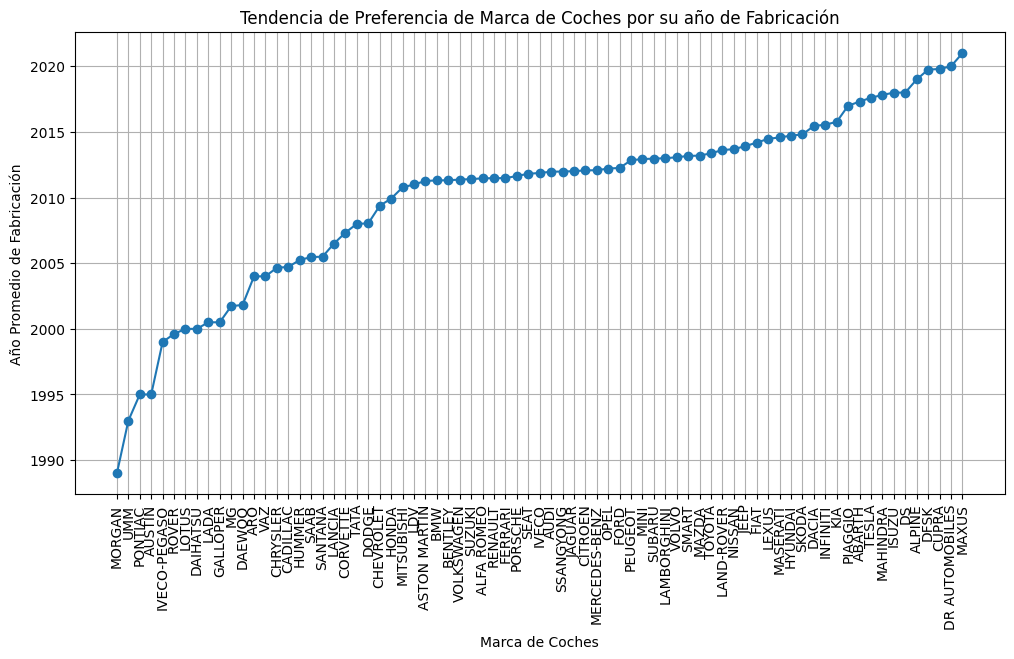

In [34]:
df = pd.read_csv("ventasAutos.csv")

# Calcular la media de la fecha de fabricación (year) por marca (make)
brand_year_mean = df.groupby('make')['year'].mean().reset_index()

# Ordenar los resultados por año promedio de menor a mayor
brand_year_mean = brand_year_mean.sort_values(by='year')

# Visualización de la tendencia de preferencia de marca de coches a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(brand_year_mean['make'], brand_year_mean['year'], marker='o')
plt.title('Tendencia de Preferencia de Marca de Coches por su año de Fabricación')
plt.xlabel('Marca de Coches')
plt.ylabel('Año Promedio de Fabricación')
plt.xticks(rotation=90)
plt.grid()
plt.show()


# Precio promedio de venta

In [36]:
df = pd.read_csv("ventasAutos.csv")
# Calcular el promedio de kilometraje de los autos vendidos
promedio_kilometraje = df['kms'].mean()

print(f"El promedio de kilometraje de los autos vendidos es: {promedio_kilometraje:.2f} kilómetros.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


El promedio de kilometraje de los autos vendidos es: 116359.09 kilómetros.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


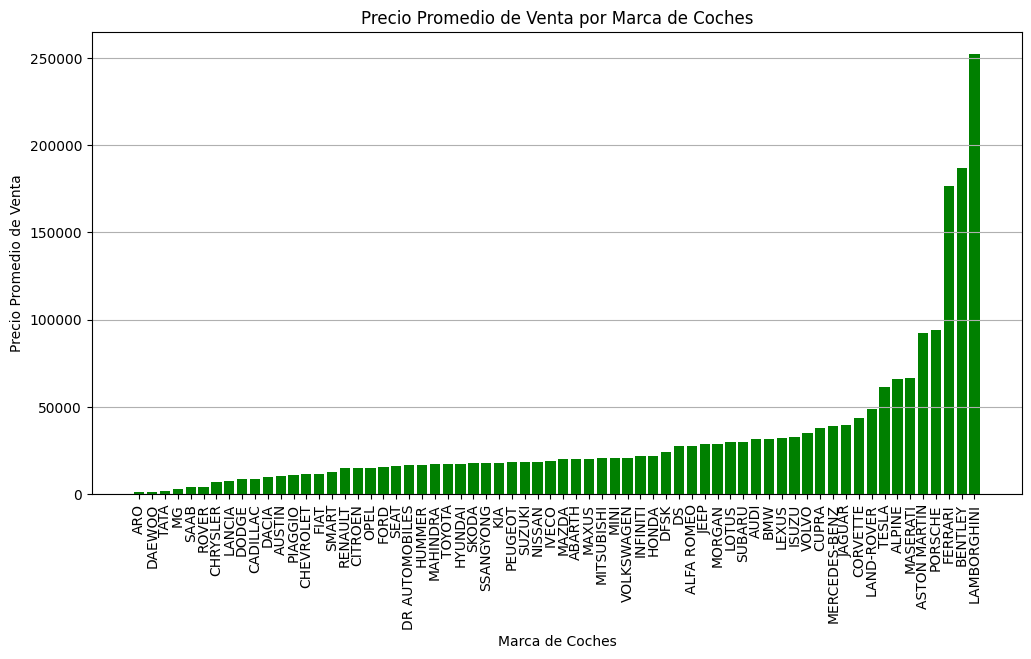

In [43]:

# Filtrar solo los coches de segunda mano, kilómetro cero y seminuevos
df = df[df['kms'] <= 80000]  # Ejemplo: se consideran vehículos con menos de 80,000 km como seminuevos

# Calcular el precio promedio de venta por marca
brand_price_mean = df.groupby('make')['price'].mean().reset_index()

# Ordenar los resultados por precio promedio de menor a mayor
brand_price_mean = brand_price_mean.sort_values(by='price')

# Visualización del precio promedio de venta por marca
plt.figure(figsize=(12, 6))
plt.bar(brand_price_mean['make'], brand_price_mean['price'], color='green')
plt.title('Precio Promedio de Venta por Marca de Coches')
plt.xlabel('Marca de Coches')
plt.ylabel('Precio Promedio de Venta')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


# Modelos de autos más vendidos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


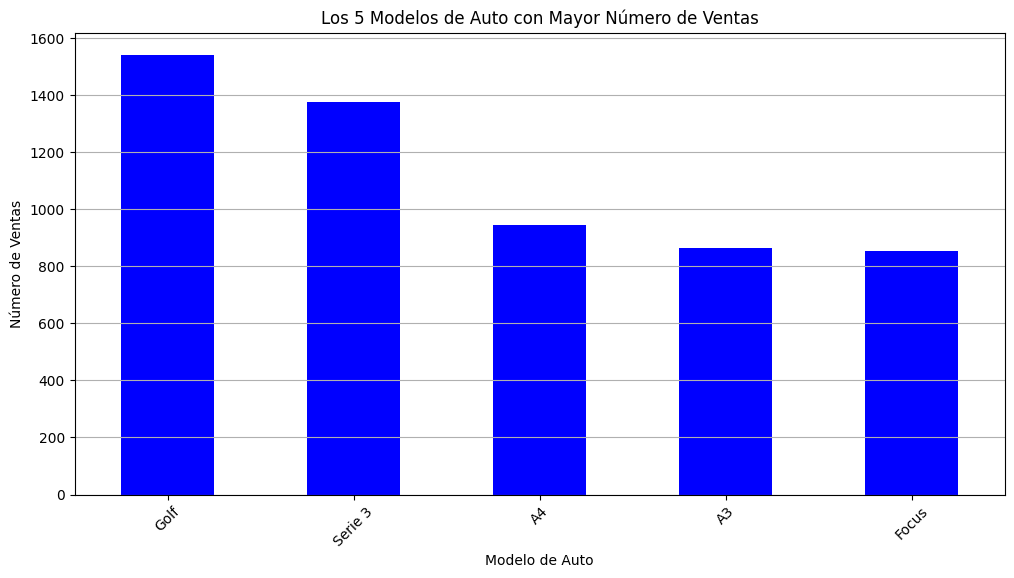

In [49]:
# Cargar el archivo CSV
df = pd.read_csv("ventasAutos.csv")

# Contar el número de ventas por modelo de auto
top_models = df['model'].value_counts().head(5)

# Visualización de los 5 modelos de auto con más ventas
plt.figure(figsize=(12, 6))
top_models.plot(kind='bar', color='blue')
plt.title('Los 5 Modelos de Auto con Mayor Número de Ventas')
plt.xlabel('Modelo de Auto')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


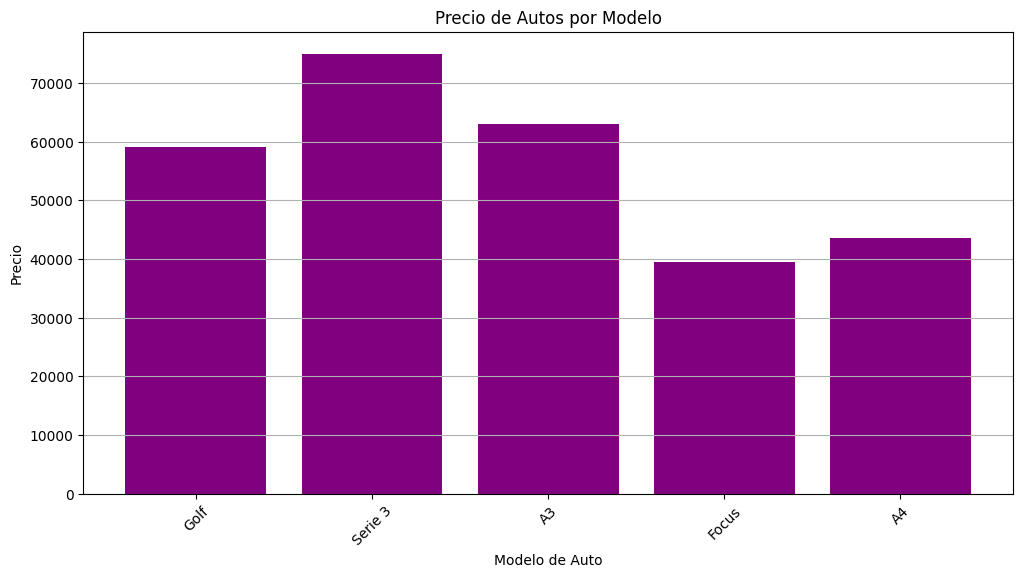

In [50]:
# Filtrar los modelos especificados
selected_models = ['Golf', 'Serie 3', 'A4', 'A3', 'Focus']
filtered_df = df[df['model'].isin(selected_models)]

# Visualización de los precios de los autos de los modelos seleccionados
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['model'], filtered_df['price'], color='purple')
plt.title('Precio de Autos por Modelo')
plt.xlabel('Modelo de Auto')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error cuadrático medio del test: 4497.327€
Error cuadrático medio del train: 2036.113€
Coeficiente de determinación (R^2) del conjunto de validación: 0.91
Coeficiente de determinación (R^2) del conjunto de entrenamiento: 0.985


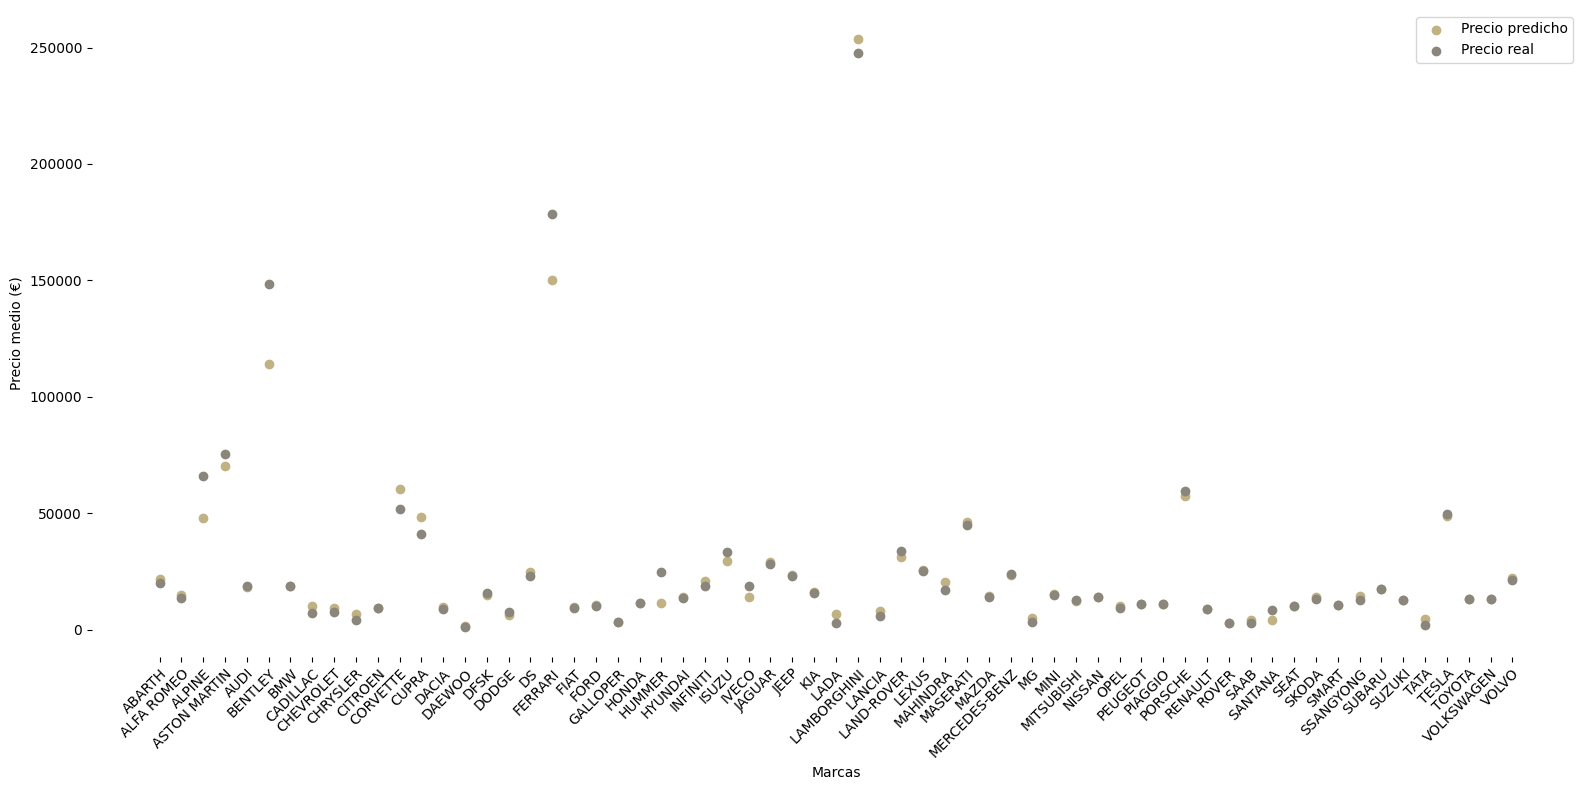

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_coches = pd.read_csv("coches-de-segunda-mano-sample.csv")
df_coches_def = df_coches[['make','model','fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color',  'is_professional', 'price']]

NUM_FEATS = ['year', 'kms', 'power']
CAT_FEATS = ['make', 'model', 'fuel', 'shift', 'color', 'doors', 'is_professional']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'price'

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value="missing")), ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-10000000))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS), ('cat', categorical_transformer, CAT_FEATS)])

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])


coches_train, coches_test = train_test_split(df_coches_def, random_state=5)

model.fit(coches_train[FEATS], coches_train[TARGET]);

y_test = model.predict(coches_test[FEATS])
y_train = model.predict(coches_train[FEATS])

r2_valid = r2_score(y_true=coches_valid[TARGET], y_pred=y_valid)
r2_train = r2_score(y_true=coches_train[TARGET], y_pred=y_train)

print(f"Error cuadrático medio del test: {mean_squared_error(y_pred=y_test, y_true=coches_test[TARGET], squared=False).round(3)}€")
print(f"Error cuadrático medio del train: {mean_squared_error(y_pred=y_train, y_true=coches_train[TARGET], squared=False).round(3)}€")

print(f"Coeficiente de determinación (R^2) del conjunto de validación: {r2_valid.round(3)}")
print(f"Coeficiente de determinación (R^2) del conjunto de entrenamiento: {r2_train.round(3)}")

coches_plot = coches_test.loc[:, ['make', 'price']]
coches_plot.loc[:, 'price_model'] = y_test
coches_plot = coches_plot.groupby('make', as_index=False).mean()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.scatter(coches_plot['make'], coches_plot['price_model'], c=['#c0b283'])
ax.scatter(coches_plot['make'], coches_plot['price'], c='#8a867b')
ax.set_xlabel('Marcas')
ax.set_ylabel('Precio medio (€)')
ax.legend(['Precio predicho', 'Precio real'])
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()
plt.show()
